In [1]:
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request

import functools

SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']
SAMPLE_SPREADSHEET_ID = '1UFTRhXxV0Hd0DgTNXP1yznf8v52htAPk_brnytVnxMQ'
SAMPLE_RANGE_NAME = 'Sheet1!B1:B53'


creds = None
if os.path.exists('token.pickle'):
    with open('token.pickle', 'rb') as token:
        creds = pickle.load(token)
if not creds or not creds.valid:
    if creds and creds.expired and creds.refresh_token:
        creds.refresh(Request())
    else:
        flow = InstalledAppFlow.from_client_secrets_file("/Users/lanza/Downloads/credentials.json", SCOPES)
        creds = flow.run_local_server(port=0)
    with open('token.pickle', 'wb') as token:
        pickle.dump(creds, token)

service = build('sheets', 'v4', credentials=creds)
sheet = service.spreadsheets()
result = sheet.values().get(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                                range=SAMPLE_RANGE_NAME).execute()
values = result.get('values', [])
flat = [item for sublist in values for item in sublist]

values = [int(val.replace(',','')) for val in flat]
indices = [index for index, value in enumerate(values)]



In [3]:
import matplotlib.pyplot as plt
import numpy
import seaborn as sbn

In [4]:
diffs = []
for i in range(0, len(values) - 1):
    diffs.append(values[i+1] - values[i])

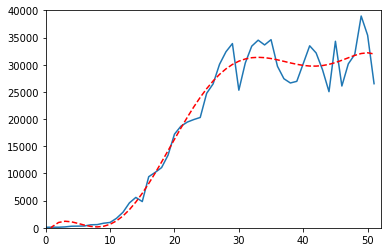

In [5]:
ind, val = zip(*enumerate(diffs))
plt.plot(ind, val)
plt.axis([0, 52, 0, 40000])


# calc the trendline
z = numpy.polyfit(ind, val, 6)
p = numpy.poly1d(z)
plt.plot(ind ,p(ind),"r--")

In [6]:
from ipysheet import sheet, cell, row, column, cell_range

sheet1 = sheet(rows=3, columns=4)
cell1 = cell(0, 0, 'Hello')
cell2 = cell(2, 0, 'World')
cell_value = cell(2, 2, 42.)

sheet1

ModuleNotFoundError: No module named 'ipysheet'

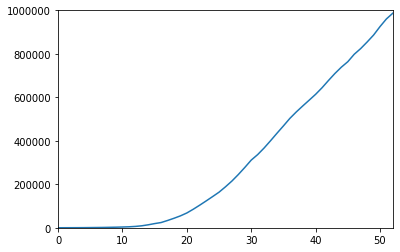

In [6]:
plt.plot(indices, values)
plt.axis([0, 52, 0, 1000000])
plt.show()

In [23]:
sheet1.cells

(Cell(column_end=0, column_start=0, row_end=0, row_start=0, type='text', value='99'),
 Cell(column_end=0, column_start=0, row_end=2, row_start=2, type='text', value='World'),
 Cell(column_end=2, column_start=2, row_end=2, row_start=2, type='numeric', value=42.0))